Below is the description for each of the values in the Dream Housing Finance credit risk dataset.




| Variable          | Description |
|:------------------|:-----|
| Loan_ID	        | Unique Loan ID |
| Gender	        | Male / Female |
| Married	        | Applicant is Married (Y/N) |
| Dependents	    | Number of Dependents |
| Education	        | Applicant Education (Graduate / Under Graduate)|
| Self_Employed	    | Self Employed (Y/N) |
| ApplicantIncome   | Applicant Income |
| CoapplicantIncome | Coapplicant Income |
| LoanAmount	    | Loan amount in Thousands |
| Loan_Amount_Term  | Term of Loan in Months |
| Credit_History	| Credit History Meets Guidelines |
| Property_Area	    | Urban / Semi Urban / Rural |
| Loan_Status	    | Loan Approved (Y/N)|

# Objective:
Dream Housing Finance wants to automate the loan eligibility process (real time) based on customer details provided while filling their application online. Dream Housing Finance wants to to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

colors = sns.color_palette("hls", 8)

In [2]:
df = pd.read_csv('/Users/katialopes-gilbert/repos/mentor-assignments/CreditRisk.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


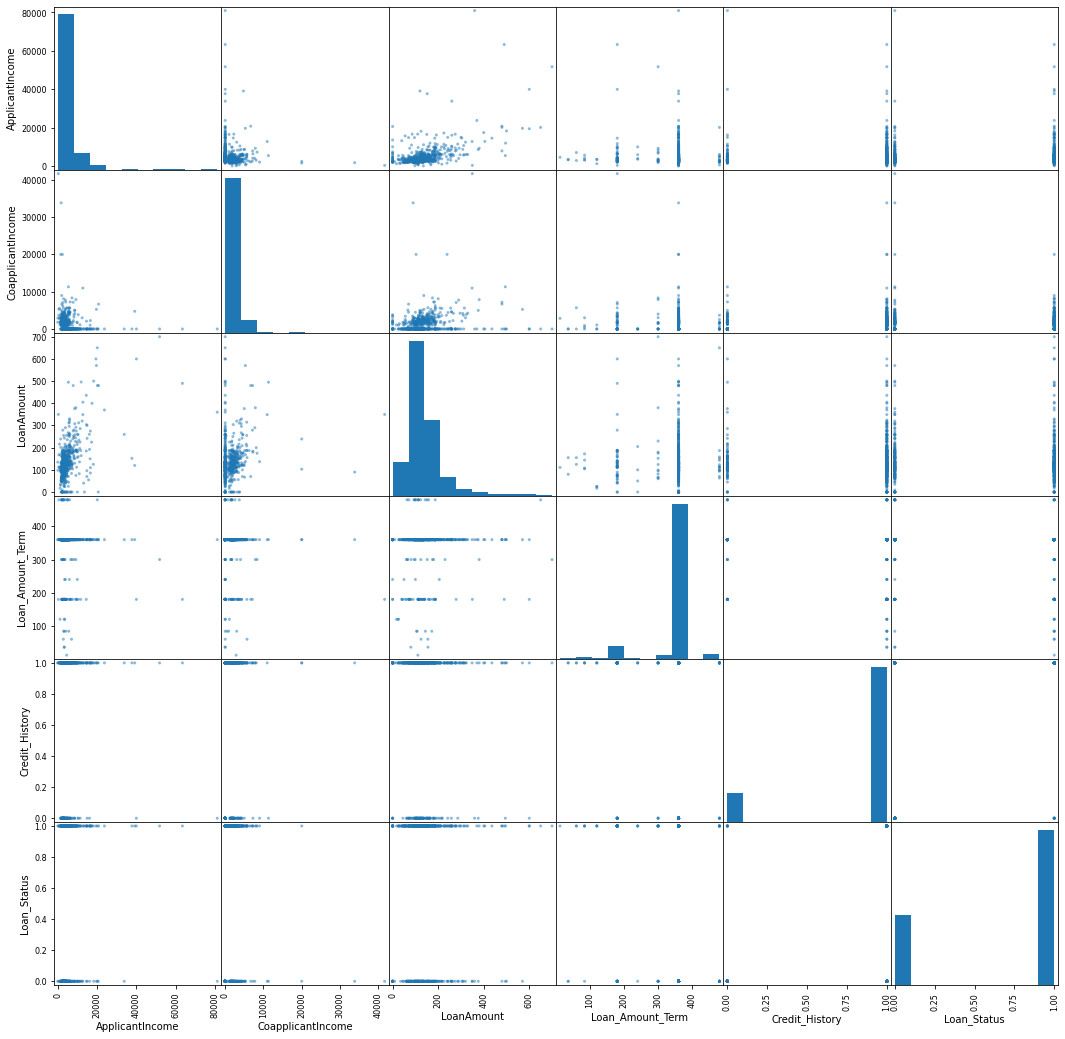

In [8]:
pd.plotting.scatter_matrix(df, figsize=(18,18));

In [9]:
df_loan_approved = df[df['Loan_Status'] == 1]

In [10]:
df_loan_approved

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1


In [11]:
df_loan_denied = df[df['Loan_Status'] == 0]

In [12]:
df_loan_denied

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360.0,0.0,Semiurban,0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360.0,1.0,Semiurban,0
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114,360.0,1.0,Rural,0
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76,360.0,0.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187,360.0,1.0,Rural,0
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88,360.0,0.0,Semiurban,0
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350,180.0,NaN,Urban,0
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,0,180.0,1.0,Urban,0
